In [1]:
import numpy as np
from utils.data_types import *
from utils.ros_helper import *
from ekf_estimator.ekf_rio_filter import *
import matplotlib.pyplot as plt
import scipy

idx test

navigation solution test

In [2]:
nav_sol = NavigationSolution()
print(nav_sol.get_position_n_b())
print(nav_sol.get_quaternion_n_b())
print(nav_sol.get_euler_n_b())
print(nav_sol.get_c_n_b())
print(nav_sol.get_pose())
print(nav_sol.get_velocity_ros())
nav_sol.get_pose_ros()

[0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[ 0. -0. -0.]


array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

System Noise Psd

In [3]:
snp = SystemNoisePsd()


Strapdown

In [4]:
st = Strapdown(9.8)
ab = np.zeros(3)
wb = np.zeros(3)
dt = 1e-3


In [5]:
st.propagate(nav_sol, ab, wb, dt)
# R.from_quat(np.array([1,0,0,1])).as_quat()

In [6]:
from ekf_estimator.ekf_rio_ros import *

In [7]:
x = np.array([1,2])
np.power(x, 2)

array([1, 4])

In [8]:
inits = InitStruct()
idx = EkfRioFilterStateIdx(); config = Ekf_Rio_config()
inits.configure(idx, config )


True

In [9]:
nav_sol_ = NavigationSolution()
nav_sol_.set_euler_n_b([np.pi, 0, 0])

# BAG

In [10]:
import rosbag
bag = rosbag.Bag('../ekf_rio_demo/vicon_easy.bag')

In [11]:
topics = [ '/sensor_platform/baro']
for topic, msg, timestamp in bag.read_messages(topics=topics):
    print(type(msg))

<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>
<class 'tmpryncn3fy._sensor_msgs__FluidPressure'>


In [12]:
ekf_rio = EKF_RIO()
ts, position, poses, velocity = ekf_rio.runFromRosbag('../ekf_rio_demo/vicon_easy.bag')

IMU initialized! and T init is 10.001560926437378
H_v[[ 9.99949049e-01  8.41214948e-06 -1.00945069e-02]
 [ 1.30302808e-06 -9.99999752e-01 -7.04262803e-04]
 [-1.00945103e-02  7.04213767e-04 -9.99948801e-01]]
H_q[[ 1.45674234e-06  7.02696868e-03  1.50158898e-04]
 [ 7.02891171e-03 -9.41588259e-08  1.46703292e-04]
 [ 1.45210312e-04 -2.17647994e-04 -1.61918060e-06]]
H_bg[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Hlbr[[ 0.          0.00698132  0.00349066]
 [-0.00698132  0.          0.00279253]
 [-0.00349066 -0.00279253  0.        ]]
H_q_b_r[[ 0.         -0.00702707 -0.00014522]
 [ 0.00702707  0.         -0.00021765]
 [ 0.00014522  0.00021765  0.        ]]
H_v[[ 9.99948948e-01 -6.32611872e-05 -1.01042892e-02]
 [-7.03612887e-05 -9.99999751e-01 -7.02327994e-04]
 [-1.01042423e-02  7.03003090e-04 -9.99948704e-01]]
H_q[[-1.03090173e-05 -9.33991093e-03 -9.61733864e-04]
 [-9.34091052e-03  6.46736908e-07  1.49527787e-05]
 [-9.55168355e-04  7.94916747e-05  9.70763332e-06]]
H_bg[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0

In [13]:
def plot(ts, var, name):    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

    # Plot on the first subplot
    ax1.plot(ts, var[:,0])

    # Plot on the second subplot
    ax2.plot(ts, var[:,1])

    # Plot on the third subplot
    ax3.plot(ts, var[:,2])

    # Add grids to all subplots
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    # add titles
    ax1.set_ylabel(f'{name}_x')
    ax2.set_ylabel(f'{name}_y')
    ax3.set_ylabel(f'{name}_z')
    # Show the figure
    plt.show()

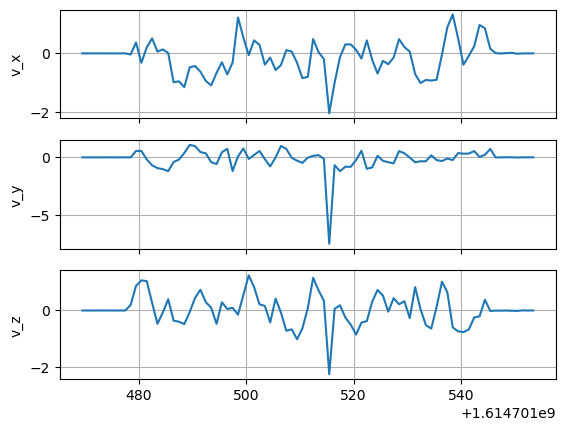

In [14]:
plot(ts, velocity, 'v')

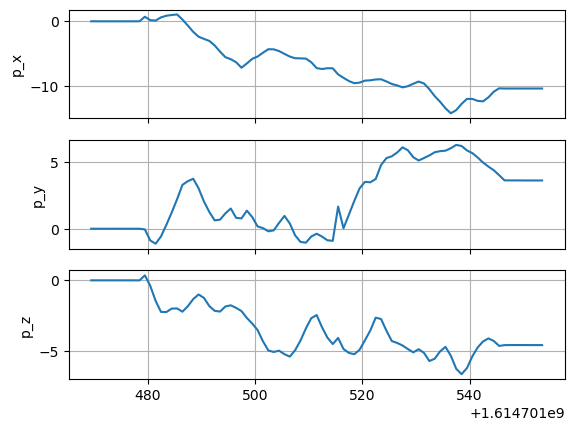

In [15]:
plot(ts, position, 'p')

In [16]:
from scipy.stats import chi2
gamma_thresh = chi2.ppf(1 - 0.25, 3) 

In [17]:
ekf_rio.ekf_rio_filter_.T_b_r_

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])